In [1]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import plotly.express as px

import sklearn.model_selection
import numpy as np

from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder
from sklearn.model_selection import KFold
import sklearn.metrics


RANDOM_STATE = 42
DATASET_YEAR = 2010

We want to predict house prices 

In [2]:
target_column = 'SalePrice'

### Training dataset 

In [3]:
df_train = pd.read_csv("datasets/train.csv")
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
df_train.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [32]:
df_test.MSSubClass.unique()

array([ 20,  60, 120, 160,  80,  30,  50,  90,  85, 190,  45,  70,  75,
       180,  40, 150])

### Test dataset 

In [4]:
df_test = pd.read_csv("datasets/test.csv")
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Numerical and categorical data

In [5]:
def convert_df(df):
    numerical_df = df.select_dtypes(include='number')
    categorical_df = df.select_dtypes(exclude='number')
    onehot_df =  pd.get_dummies(categorical_df,dummy_na=False)
    all_df = pd.concat([numerical_df,onehot_df],axis=1)
    return all_df,numerical_df.columns

In [6]:
train, num_col_train = convert_df(df_train)
test, num_col_test = convert_df(df_test)

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,0.002056,0.080192,0.002742,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,0.045314,0.271683,0.052306,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# columns that work for the training  
columns_test_price = test.columns.values.tolist() + [target_column]
train = train[columns_test_price]
y = train['SalePrice']

In [10]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

add more interesting columns ( we are going to read the data_description.txt as to better understand the dataset ) 

let's modify the MSSubClass accordingly

In [11]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
[col for col in train.columns if "Yr" in col or "Year" in col]

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

<AxesSubplot: xlabel='MoSold', ylabel='Count'>

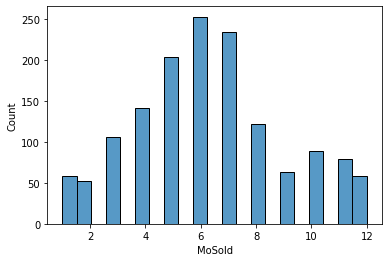

In [13]:
sns.histplot(train["MoSold"]) # Looks like a normal distributi

In [14]:
train["YrGarage_at_sale"] = (train.GarageYrBlt - train.YearBuilt).abs()
test["YrGarage_at_sale"] = (test.GarageYrBlt - test.YearBuilt).abs() # year of garage
train = train.drop(columns="GarageYrBlt")
test = test.drop(columns="GarageYrBlt")

In [31]:
num_list = num_col_train.tolist()
num_list.remove("Id")
print(num_list)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [15]:
train["years_since_remod"] = train.YearRemodAdd - train.YearBuilt
test["years_since_remod"] = test.YearRemodAdd - test.YearBuilt
train = train.drop(columns="YearRemodAdd")
test = test.drop(columns="YearRemodAdd")

In [16]:
train["age_at_sale"] = train.YrSold - train.YearBuilt
test["age_at_sale"] = test.YrSold - test.YearBuilt
train = train.drop(columns="YearBuilt")
test = test.drop(columns="YearBuilt") # Year not relevant because it is only the age of the building at the moment of the sale that counts

1. Positively Skewed Distribution (Right-Skewed):

    - Log Transformation: Reduces skewness for right-skewed data.
    - Square Root Transformation: Effective for moderately skewed data.
    - Box-Cox Transformation: Adapts to the data to find the best transformation for positive values.

2. Negatively Skewed Distribution (Left-Skewed):

    - Inverse Transformation (1/x): Helps in normalizing left-skewed data.
    - Square Transformation (x²): Can also be used for negatively skewed data.
    - Yeo-Johnson Transformation: Similar to Box-Cox but applicable for zero and negative values.

3. High Kurtosis (Leptokurtic Distribution):

    - Log Transformation: Can be used if the data is also skewed.
    - Box-Cox or Yeo-Johnson Transformation: Adjusts the data to reduce peakiness.

4. Low Kurtosis (Platykurtic Distribution):

    - Exponential Transformation: Increases the peak of the distribution.
    - Higher-degree Polynomial Transformations: Like cubic or higher powers to increase kurtosis.

5. Bimodal or Multimodal Distribution:

    - Segmentation and Separate Transformation: It might be better to segment the data into different groups and apply transformations separately.

6. Uniform Distribution: 

    - Transformations are not typically necessary: Uniform distributions are already evenly spread, and normalization might not add value.

7. Normal Distribution:

    - No Transformation Needed: If the data already follows a normal distribution, no transformation is necessary.

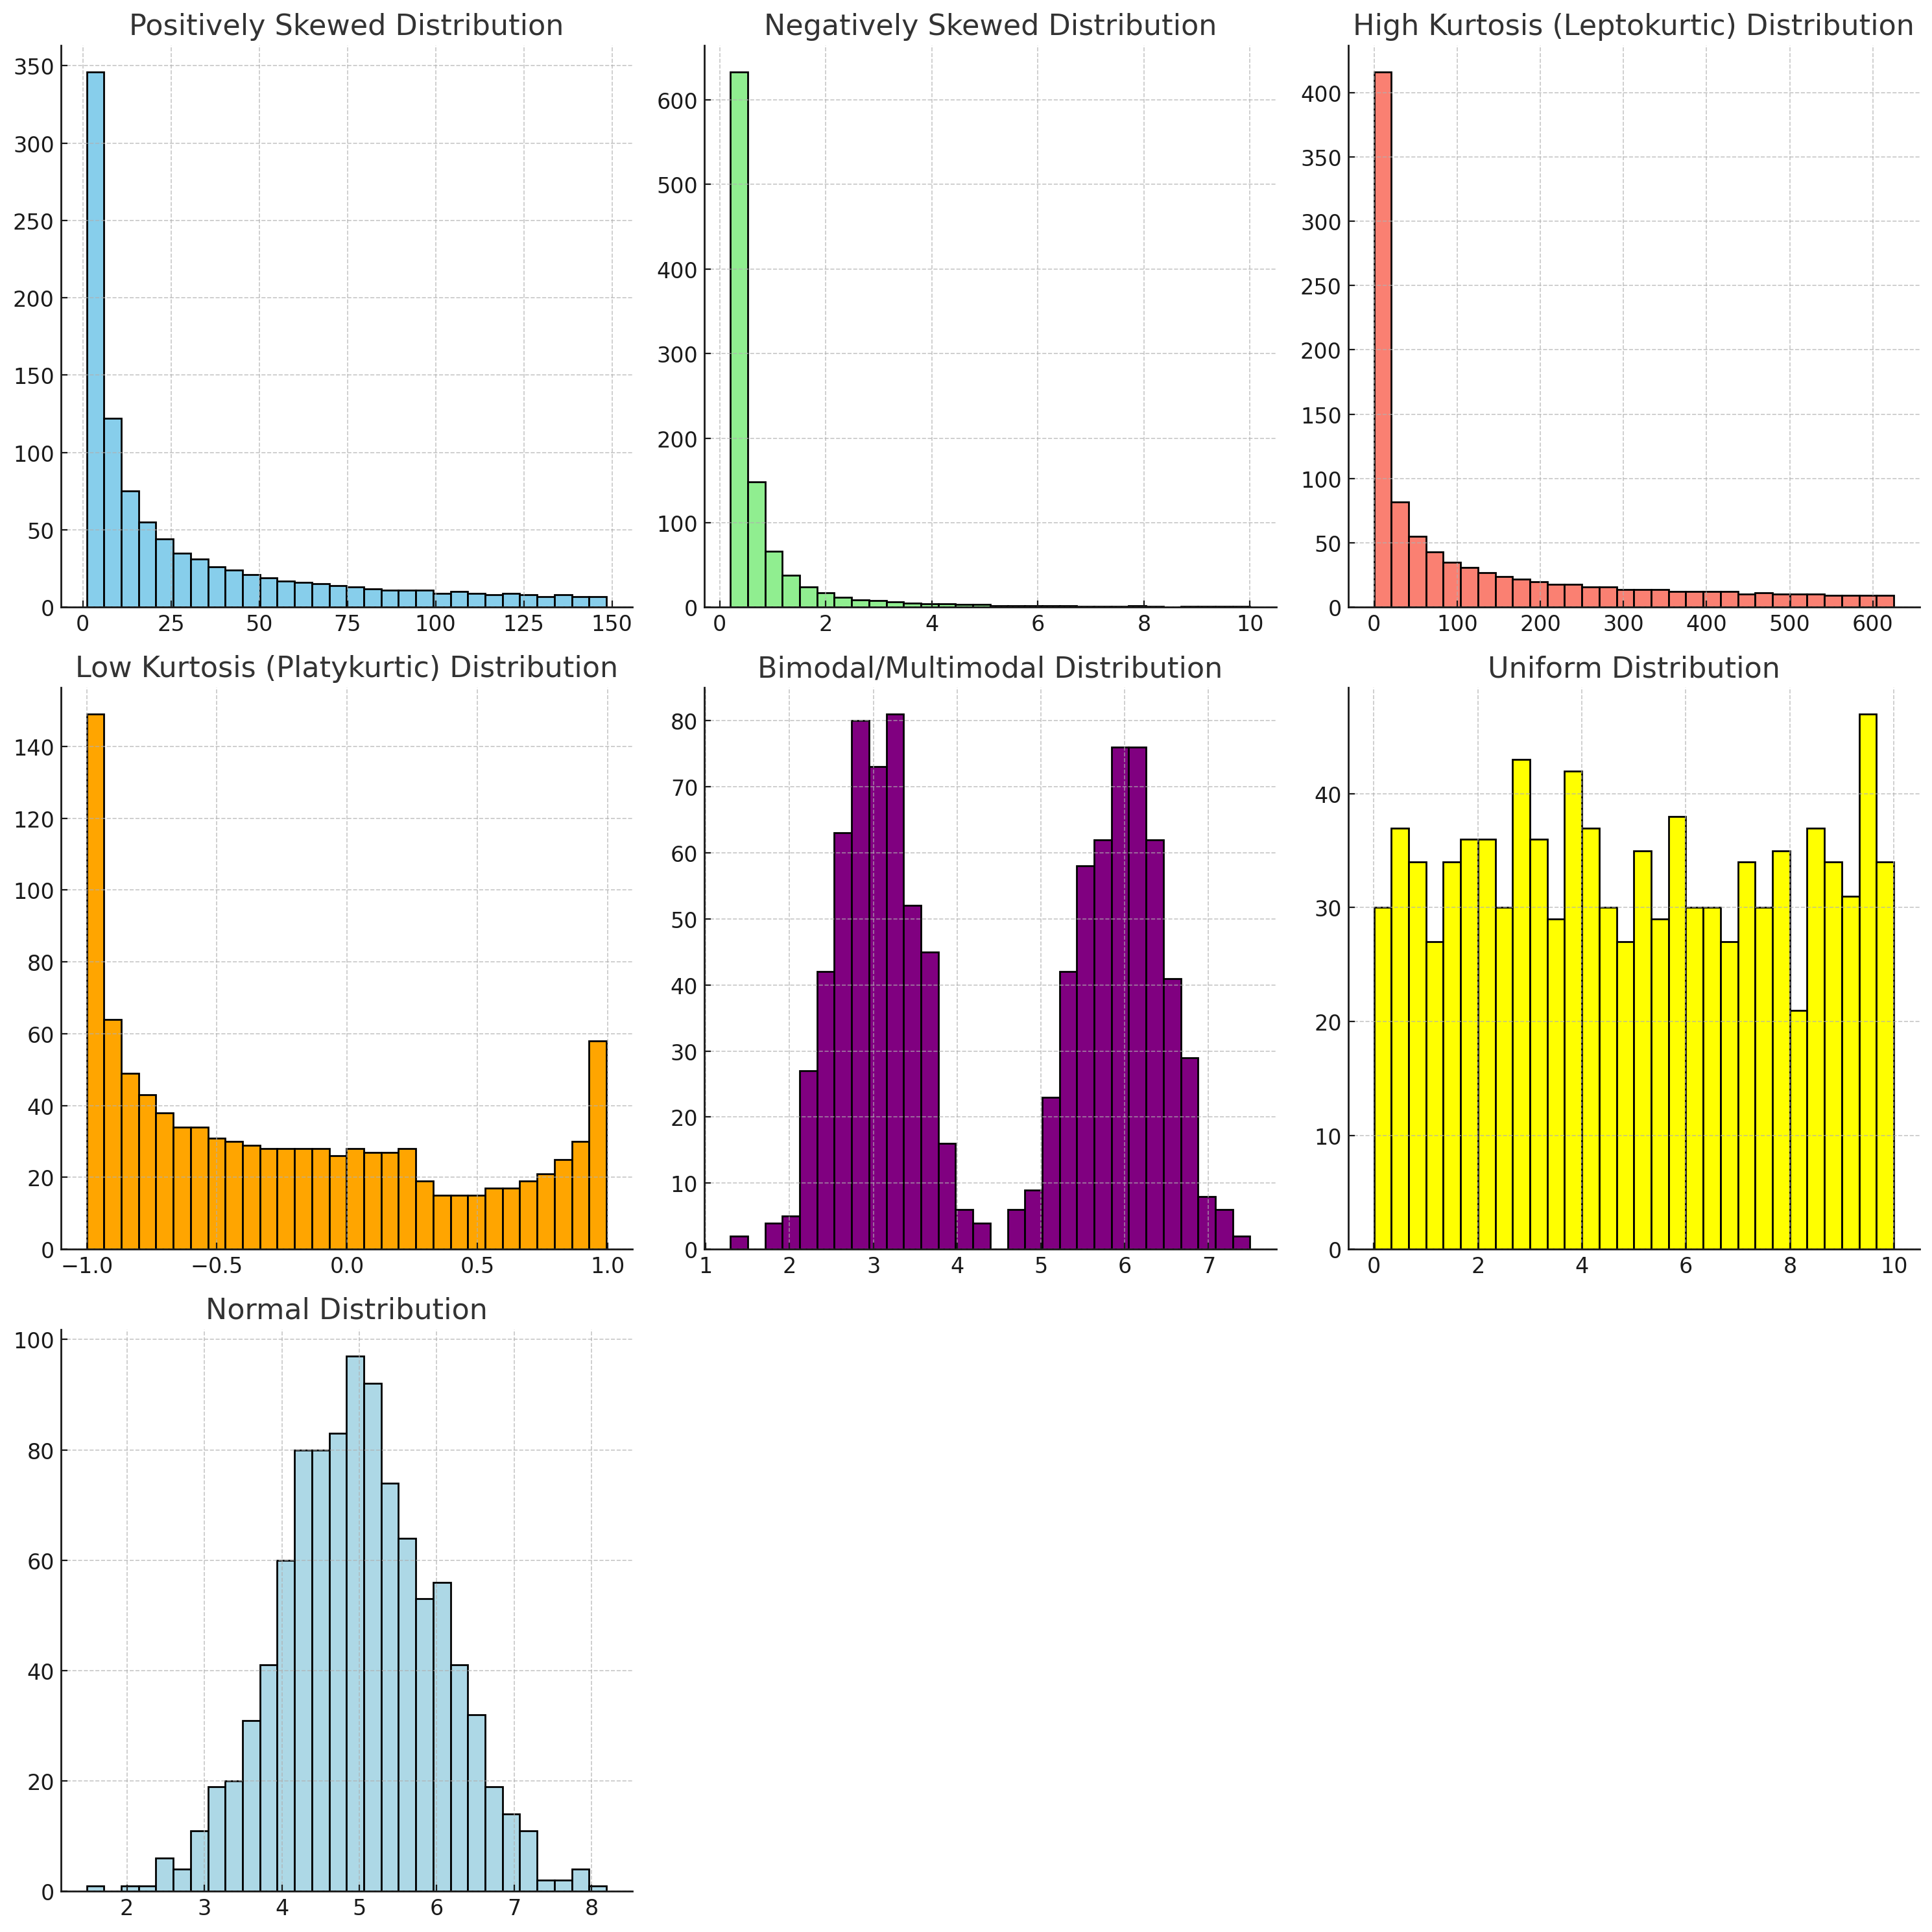

<ipython-input-17-fc81226af4c3>:5: RuntimeWarning: divide by zero encountered in log
  train[col].map(lambda x : np.log(x)).plot.hist()
<ipython-input-17-fc81226af4c3>:5: RuntimeWarning: divide by zero encountered in log
  train[col].map(lambda x : np.log(x)).plot.hist()
<ipython-input-17-fc81226af4c3>:5: RuntimeWarning: divide by zero encountered in log
  train[col].map(lambda x : np.log(x)).plot.hist()
<ipython-input-17-fc81226af4c3>:5: RuntimeWarning: divide by zero encountered in log
  train[col].map(lambda x : np.log(x)).plot.hist()
<ipython-input-17-fc81226af4c3>:5: RuntimeWarning: divide by zero encountered in log
  train[col].map(lambda x : np.log(x)).plot.hist()
<ipython-input-17-fc81226af4c3>:5: RuntimeWarning: divide by zero encountered in log
  train[col].map(lambda x : np.log(x)).plot.hist()
<ipython-input-17-fc81226af4c3>:5: RuntimeWarning: divide by zero encountered in log
  train[col].map(lambda x : np.log(x)).plot.hist()
<ipython-input-17-fc81226af4c3>:5: RuntimeWarnin

error on MasVnrArea
error on BsmtFinSF1
error on BsmtFinSF2
error on BsmtUnfSF
error on TotalBsmtSF
error on 2ndFlrSF
error on LowQualFinSF
error on BsmtFullBath
error on BsmtHalfBath
error on FullBath
error on HalfBath
error on BedroomAbvGr
error on KitchenAbvGr
error on Fireplaces
error on GarageCars
error on GarageArea
error on WoodDeckSF
error on OpenPorchSF
error on EnclosedPorch
error on 3SsnPorch
error on ScreenPorch
error on PoolArea
error on MiscVal


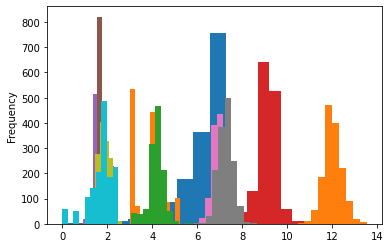

In [17]:
cols_logs = []
for col in num_col_train:
    if col in train.columns:
        try :
            train[col].map(lambda x : np.log(x)).plot.hist()
            cols_logs.append(col)
        except:
            print(f"error on {col}")
    else:
        pass

In [25]:
train[num_col_train] = train[num_col_train].apply(lambda x : np.log(x))

KeyError: "['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'] not in index"

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,YrGarage_at_sale,years_since_remod,age_at_sale
0,-inf,1.409607,1.428968,2.201872,0.665730,0.475885,196.0,706,0,150,...,0,0,0,0,1,0,2.505338,0.0,0,5
1,-0.366513,1.097189,1.477511,2.215885,0.583198,0.732099,0.0,978,0,284,...,0,0,0,0,1,0,2.493950,0.0,0,31
2,0.094048,1.409607,1.439718,2.233034,0.665730,0.475885,162.0,486,0,434,...,0,0,0,0,1,0,2.510994,0.0,1,7
3,0.326634,1.446565,1.409607,2.215315,0.665730,0.475885,0.0,216,0,540,...,1,0,0,0,0,0,2.472277,83.0,55,91
4,0.475885,1.409607,1.488584,2.258133,0.732099,0.475885,350.0,655,0,490,...,0,0,0,0,1,0,2.520050,0.0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.985604,1.409607,1.417583,2.194640,0.583198,0.475885,0.0,0,0,953,...,0,0,0,0,1,0,2.490934,0.0,1,8
1456,1.985699,1.097189,1.491251,2.249825,0.583198,0.583198,119.0,790,163,589,...,0,0,0,0,1,0,2.505923,0.0,10,32
1457,1.985793,1.446565,1.432618,2.209333,0.665730,0.787195,0.0,275,0,877,...,0,0,0,0,1,0,2.525179,0.0,65,69
1458,1.985887,1.097189,1.439718,2.217205,0.475885,0.583198,0.0,49,1029,0,...,0,0,0,0,1,0,2.473548,0.0,46,60


In [22]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

In [23]:
# Define a cross validation procedure
kf = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)
kf

features = train.drop(columns=["Id",target_column]).columns

linear_model = LinearRegression()
train_df = train.copy()
for idx_train, idx_val in kf.split(train_df):
  X_train = train_df.loc[idx_train].drop(columns=['Id', target_column])[features]
  y_train = train_df[target_column][idx_train]
  X_val = train_df.loc[idx_val].drop(columns=['Id', target_column])[features]
  y_val = train_df[target_column][idx_val]
  xgb_model = xgb.XGBRegressor()
  xgb_model.fit(X=X_train, y=y_train)

  y_val_pred = xgb_model.predict(X=X_val)
  score = mean_squared_log_error(y_true=y_val, y_pred=y_val_pred)
  print(score)

XGBoostError: [15:09:04] /workspace/src/data/../common/../data/gradient_index.h:94: Check failed: valid: Input data contains `inf` or a value too large, while `missing` is not set to `inf`
Stack trace:
  [bt] (0) /home/arawn/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x3effba) [0x7f97a97effba]
  [bt] (1) /home/arawn/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x407477) [0x7f97a9807477]
  [bt] (2) /home/arawn/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x3f6316) [0x7f97a97f6316]
  [bt] (3) /home/arawn/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x3f8858) [0x7f97a97f8858]
  [bt] (4) /home/arawn/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x3a2a07) [0x7f97a97a2a07]
  [bt] (5) /home/arawn/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGQuantileDMatrixCreateFromCallback+0x2b0) [0x7f97a9565c40]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.7(+0x6d1d) [0x7f980dc83d1d]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.7(+0x6289) [0x7f980dc83289]
  [bt] (8) /usr/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x13360) [0x7f980dd5f360]

